We have the optimal control problem
\begin{align}
&\underset{u}{\mathrm{min}}\,\, -x(1)-\int_{-1}^{1}(1-u(t))x(t)dt\\
&\textrm{s.t.}\,\,  \dot{x}(t)=\frac{1}{2}u(t)x(t)\\
&x(-1)=1\\
&u(t)\in [0,1]
\end{align}


I will solve this using first Hamilton-Jacobi-Bellman equation, then Pontryagin's minimum principle. Then lastly using the package Gekko.

#Hamilton-Jacobi-Bellman equation


1) We have the Hamiltonian
\begin{align}
H(t,x,u,\lambda) = -(1-u)x+\frac{1}{2}\lambda ux
\end{align}

2) The pointwise optimization
\begin{align}
\mu(t,x,\lambda) &= \underset{u}{\mathrm{argmin}}\,\,H = \underset{u}{\mathrm{argmin}}\,\,(-(1-u)x+\frac{1}{2}\lambda ux)\\
&= \underset{u}{\mathrm{argmin}}\,\,((1+\frac{1}{2}\lambda)ux-x)\\
&= \underset{u}{\mathrm{argmin}}\,\,((1+\frac{1}{2}\lambda)ux)\\
&=\begin{cases}
1&,\quad \text{if}\,\,(1+\frac{1}{2}\lambda)x <0\\
0&,\quad \text{if}\,\,(1+\frac{1}{2}\lambda)x >0\\
\text{any} \in [0,1] &,\quad \text{if}\,\,(1+\frac{1}{2}\lambda)x =0\\
\end{cases}
\end{align}
The optimal control is
\begin{align}
u^*(t) = \mu(t,x,V_x) = \begin{cases}
1&,\quad \text{if}\,\,(1+\frac{1}{2}V_x)x <0\\
0&,\quad \text{if}\,\,(1+\frac{1}{2}V_x)x >0\\
\text{any} \in [0,1] &,\quad \text{if}\,\,(1+\frac{1}{2}V_x)x =0\\
\end{cases}
\end{align}
But we have that $x(t)>0 \,\, \forall t$ since we the constraints
\begin{align}
\dot{x}(t)&=u(t)x(t)\\
x(-1)&=1\\
u(t)&\in [0,1]
\end{align}
We can rewrite the optimal control as
\begin{align}
u^*(t) = \begin{cases}
1&,\quad \text{if}\,\,\frac{1}{2}V_x <-1\\
0&,\quad \text{if}\,\,\frac{1}{2}V_x >-1\\
\text{any} \in [0,1] &,\quad \text{if}\,\,\frac{1}{2}V_x=-1\\
\end{cases}
\end{align}
3) The Hamilton-Jacobi-Bellman equation becomes
\begin{align}
-V_t &= H(t,x,\mu(t,x,V_x),V_x) \Rightarrow 
\begin{cases}
V_t = -\frac{1}{2}V_x x,\quad \text{if} \,\,(1+\frac{1}{2}V_x)x <0 \\
V_t = x,\quad \text{if}\,\,(1+\frac{1}{2}V_x)x >0
\end{cases}\\
&\textrm{s.t.}\,\, V(x,1)=-x
\end{align}


Lets try seperation of variables $V(x,t)=X(x)T(t)$
\begin{align}
\begin{cases}
X(x)T'(t) = -\frac{1}{2}X'(x)T(t) x,\quad \text{if} \,\,(1+\frac{1}{2}X'(x)T(t))x <0 \\
X(x)T'(t) = x,\quad \text{if}\,\,(1+\frac{1}{2}X'(x)T(t))x >0
\end{cases}\\
\end{align}

The first equation can be rewritten as
\begin{align}
X(x)T'(t) &= -\frac{1}{2}X'(x)T(t)x\\
-\frac{T'(t)}{T(t)}&=\frac{1}{2}\frac{X'(x)x}{X(x)}=\alpha
\end{align}
where $\alpha$ is some constant since both side only depende on its own respective variable.
Solving these ordinary differential equations is very straight forward.
\begin{align}
\begin{cases}
T(t) &=b e^{-\alpha t} \\
X(x) &=c x^{2\alpha}
\end{cases}
\Rightarrow V(x,t) = de^{-\alpha t}x^{2\alpha} \quad \text{if} \,\, 2\alpha\, d\, e^{-\alpha t} x^{2\alpha - 1}<-1
\end{align}
where $d=bc$.

The second equation can be rewritten as
\begin{align}
X(x)T'(t) &= x\\
T'(t)&=\frac{x}{X(x)}=\beta
\end{align}
where $\beta$ is some constant since both side only depende on its own respective variable.
Solving these ordinary differential equations is very straight forward.
\begin{align}
\begin{cases}
T(t) &=\beta t+a \\
X(x) &=x / \beta
\end{cases}
\Rightarrow V(x,t) = x\left(\frac{a}{\beta}+t\right) \quad \text{if} \,\, \frac{a+\beta t}{2\beta}>-1
\end{align}


Now we have to find out which of these two "V's" is the one that the boundary condition applies to.

We can start with the second equation. 

\begin{align}
V(x,1) &= -x = x\left(\frac{a}{\beta}+1\right) \Rightarrow \beta = -a/2
\end{align}
Lets plug that into the interval condition
\begin{align}
\frac{t-2}{2}>-1 \Rightarrow t>0
\end{align}
We see that the switch point is $t=0$ and that our second equation becomes

\begin{align}
V(x,t) &= x\left(-2+t\right) \quad \text{if} \,\, t>0
\end{align}

Now we can use this as a boundary condition for the first equation

\begin{align}
V(x,0) &= de^{0}x^{2\alpha} = -2x \Rightarrow \alpha = 1/2\, , d=-2
\end{align}

Finally we have have
\begin{align}
V(x,t) = 
\begin{cases}
&-2e^{-t/2}x \quad \text{if} \,\,t<0\\
&\left(-2+t\right)x \quad \text{if} \,\, t>0
\end{cases}
\end{align}
and the optimal control
\begin{align}
u^*(t,x(t)) = 
\begin{cases}
&1 \quad \text{if} \,\,t<0\\
&0 \quad \text{if} \,\, t>0
\end{cases}
\end{align}
Lets plot the results

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
h = 0.001
t = np.arange(-1,1,h)
n = len(t)

def u(t):
  if t<0:
    return int(1)
  if t>=0:
    return int(0)

def f(x,t):
  return 1/2*x*u(t)

def xdiff():
  xn = [1]
  t0 = -1
  for i in range(n):
    k1 = h * f(xn[i],t0)
    k2 = h * f(xn[i]+k1/2,t0+h/2)
    k3 = h * f(xn[i]+k2/2,t0+h/2)
    k4 = h * f(xn[i]+k3,t0+h)
    k = (k1+2*k2+2*k3+k4)/6
    xn.append(xn[i] + k)
    
    t0 = t0+h

  return xn[:-1]

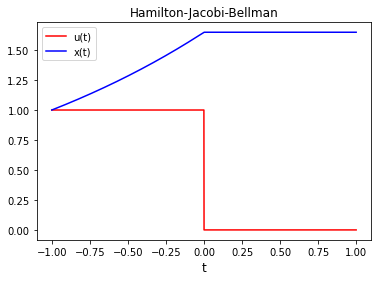

In [22]:
plt.plot(t,[u(t) for t in t], color ='r', label=r'u(t)')
plt.plot(t,xdiff(), color ='b', label=r'x(t)')
plt.legend()
plt.title('Hamilton-Jacobi-Bellman')
plt.xlabel('t',fontsize = 12)
plt.show()

 # Pontryagin's minimum principle
 

1) We have the Hamiltonian
\begin{align}
H(t,x,u,\lambda) = -(1-u)x+\frac{1}{2}\lambda ux
\end{align}

2) The pointwise optimization
\begin{align}
u^*(t)=\mu(t,x,\lambda) &= \underset{u}{\mathrm{argmin}}\,\,H = \underset{u}{\mathrm{argmin}}\,\,(-(1-u)x+\frac{1}{2}\lambda ux)\\
&= \underset{u}{\mathrm{argmin}}\,\,((1+\frac{1}{2}\lambda)ux-x)\\
&= \underset{u}{\mathrm{argmin}}\,\,((1+\frac{1}{2}\lambda)ux)\\
&=\begin{cases}
1&,\quad \text{if}\,\,(1+\frac{1}{2}\lambda) <0\\
0&,\quad \text{if}\,\,(1+\frac{1}{2}\lambda) >0\\
\text{any} \in [0,1] &,\quad \text{if}\,\,(1+\frac{1}{2}\lambda) =0\\
\end{cases}
\end{align}

3) The adjoint equation
\begin{align}
\dot{\lambda} &= -\frac{\partial}{\partial x}H(t,x,u^*,\lambda)\\
&=(1-u^*)-\frac{1}{2}\lambda u^*\\
&=\begin{cases}
-\lambda/2 &,\quad \text{if}\,\, u^*=1\,\, (1+\frac{1}{2}\lambda) <0\\
1 &,\quad \text{if}\,\, u^*=0\,\, (1+\frac{1}{2}\lambda) >0\\
1 &,\quad \text{if}\,\, 1+\frac{1}{2}\lambda =0\\
\end{cases}
\end{align}
with the boundary condition
\begin{align}
\lambda(1)=-1
\end{align}

Let look at the switching condition at the boundary
\begin{align}
1+\frac{1}{2}\lambda(1)=1-\frac{1}{2}>0
\end{align}
this means that $u^*=0$ at the boundary

Lets solve 
\begin{align}
\dot{\lambda}=1 \Rightarrow \lambda(t) = t-2
\end{align}
using the boundary condition to determine the constant of integration.

Lets solve 
\begin{align}
\dot{\lambda}= -\lambda/2\Rightarrow \lambda = c e^{-t/2}
\end{align}
We know that the switch happens at $1+\lambda/2 = 0$. That means
\begin{align}
1+\frac{t-2}{2}=0 \Rightarrow t = 0
\end{align}
We can now determine the last constant
\begin{align}
c e^{0}=0-2 \Rightarrow d=-2
\end{align}
The optimal control is
\begin{align}
u^*(t,x(t)) = 
\begin{cases}
&1 \quad \text{if} \,\,t<0\\
&0 \quad \text{if} \,\, t>0
\end{cases}
\end{align}
which is the same as for the HJB case and we therefore dont need to plot it once more

In [23]:
!pip install gekko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


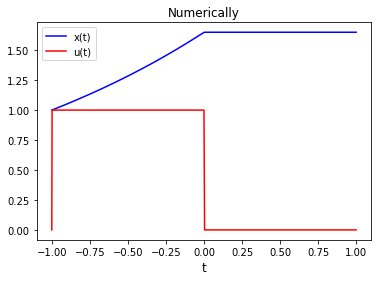

In [24]:
from gekko import GEKKO

m = GEKKO()
nt = 1001
m.time = np.linspace(-1,1,nt)

x1 = m.Var(value=1)
x2 = m.Var(value=-1)
u = m.Var(value=0,lb=0,ub=1)

p = np.zeros(nt) # mark final time point
p[-1] = 1.0

final = m.Param(value=p)

m.Equation(x1.dt()==1/2*u*x1)
m.Equation(x2.dt()==-(1-u)*x1)

m.Obj(x2*final-x1*final)

m.options.IMODE = 6 
m.solve(disp=False) 


plt.plot(m.time,x1.value,'b',label=r'x(t)')
plt.plot(m.time,u.value,'r',label=r'u(t)')
plt.title('Numerically')
plt.legend()
plt.xlabel('t',fontsize = 12)
plt.show()